# Homework 4 
By: Lawrence Lechuga
Date: 11/04/2020

## Problem 7
### Method 1:
"Throws darts" at the upper quadrants and takes the ratio of successes falling within the circle relative to the total number of trials. This is a purely $\text{binomial}(n,p)$ process where the probability of success is the ratio of the areas and $n$ is the number of trials. 
### Method 2:
Takes the functional form of the circle and calculates the average dimension in y. The area is then calculated by taking the mean value of $f(x)$ times the diameter to estimate the area. This is a Gaussian process that will converge to the correct answer based on the CLT.

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

<ipython-input-24-38525ae8e93f>:11: RuntimeWarning: invalid value encountered in sqrt
  G = np.longdouble(np.sqrt(radius**2-X**2));


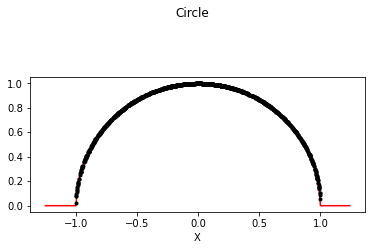

The calculated area is A =  3.1401597874737017264
The true area is A =  3.141592653589793116


In [24]:
# -------------- Edit these --------------------------------------#
trials = 10 # Modify the number of trials to n = 10, 100, 10000.
radius = np.longdouble( 1 ) # Radius of the circle
flag = 2 # experiment 1 or experiment 2
#-----------------------------------------------------------------#
c = np.longdouble(radius+radius/10);

lims = np.longdouble(2*radius+radius/2);
X = np.longdouble(np.arange(-lims/2,lims/2,0.01))

G = np.longdouble(np.sqrt(radius**2-X**2));
G[np.isnan(G)] = 0

fig, axs = plt.subplots(1)
fig.suptitle('Circle')
axs.plot(X, G,'r-')
# initialize some arrays and a list
x = np.empty(trials)
u = np.empty(trials)
#g = []
g = 0

if (flag ==1):
    f_x = 0
    for ii in range(0,trials):
        x[ii] = np.longdouble(lims*(random.uniform(0, 1)-0.5))
        f_x = np.longdouble(np.sqrt(radius**2-x[ii]**2)) # This can be any function/pdf
        u[ii] = np.longdouble(c*random.uniform(0, 1))
        if (f_x>u[ii]):
            #g.append(x[ii])
            g = g+1
            axs.plot(x[ii],u[ii],'g.')
        else:
            axs.plot(x[ii],u[ii],'k.')
    
    counts = len(g)
    calc_area = 2*(counts/trials)*(c*lims)
    true_area = np.pi*radius**2
else:
    f_x = np.empty(trials)
    for ii in range(0,trials):
        x[ii] = 2*radius*(random.uniform(0, 1)-0.5)
        f_x[ii] = np.sqrt(radius**2-x[ii]**2) # This can be any function/pdf
        axs.plot(x[ii],f_x[ii],'k.')
        
    calc_area = 2*(np.sum(f_x)*2*radius/trials)
    true_area = np.pi*radius**2

axs.set_aspect('equal')
axs.set_xlabel('X')
plt.show()

# Calculations
print('The calculated area is A = ',calc_area)
print('The true area is A = ',true_area)
